In [86]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [87]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

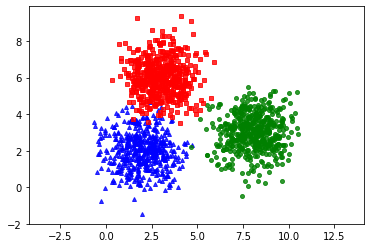

In [88]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [89]:
points = np.vstack((X0,X1,X2))
points

array([[ 3.74945474,  1.713927  ],
       [ 1.51543487, -0.65331856],
       [ 1.99171537,  1.68036864],
       ...,
       [ 2.56402984,  5.10138061],
       [ 3.62998852,  6.60564711],
       [ 2.31894139,  6.84856953]])

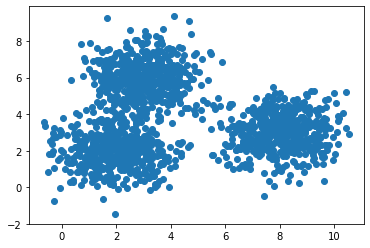

In [90]:
plt.scatter(points[:, 0], points[:, 1])

In [91]:
def identify_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

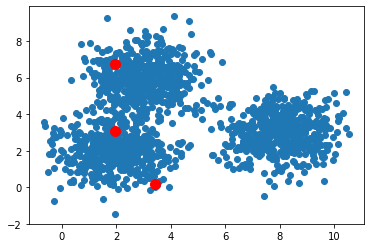

In [92]:
plt.scatter(points[:, 0], points[:, 1])
centroids = identify_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [93]:
print(points.shape)
print(centroids.shape)
print(centroids[:, np.newaxis].shape)

(1500, 2)
(3, 2)
(3, 1, 2)


In [94]:
def closest_centroid(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [95]:
def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [96]:
move_centroids(points, closest_centroid(points, centroids), centroids)

array([[3.10860301, 6.24718448],
       [2.49941292, 2.87813455],
       [6.85799117, 2.3908974 ]])

In [97]:
def k_mean(points, k):
  centroids = identify_centroids(points, k)
  running = True
  while running:
    closest = closest_centroid(points, centroids)
    old_centroids = centroids
    centroids = move_centroids(points, closest, centroids)
    # print(centroids)
    # print(old_centroids)
    if (old_centroids == centroids).all():
      running = False
  return closest,centroids

In [98]:
def k_display(points,closest,centroids):
    plt.scatter(points[:, 0], points[:, 1], c=closest)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    plt.show()

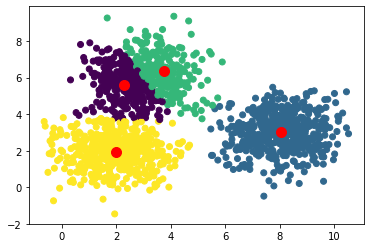

In [99]:
closest,centroids = k_mean(points, 4)
k_display(points,closest,centroids)

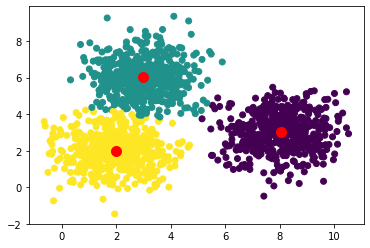

In [100]:
closest,centroids = k_mean(points, 3)
k_display(points,closest,centroids)

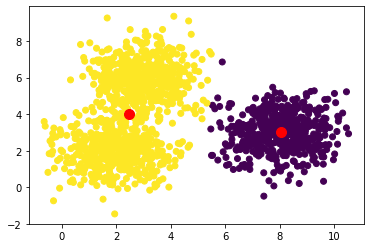

In [101]:
closest,centroids = k_mean(points, 2)
k_display(points,closest,centroids)

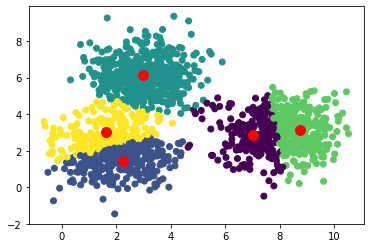

In [105]:
closest,centroids = k_mean(points, 5)
k_display(points,closest,centroids)